<h1>Lab 1</h1>
<h2>EDA, Linear Regression and Multiple Linear Regression</h2>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [ ]:
trip = pd.read_csv("TripA01.csv")
trip.head()

,Time [s],Velocity [km/h],Elevation [m],Throttle [%],Motor Torque [Nm],Longitudinal Acceleration [m/s^2],Regenerative Braking Signal,Battery Voltage [V],Battery Current [A],Battery Temperature [°C],...,AirCon Power [kW],Heater Signal,Heater Voltage [V],Heater Current [A],Ambient Temperature [°C],Coolant Temperature Heatercore [°C],Requested Coolant Temperature [°C],Coolant Temperature Inlet [°C],Heat Exchanger Temperature [°C],Cabin Temperature Sensor [°C]
0,0.0,0.0,574.0,0.0,0.0,-0.03,0.0,391.4,-2.20,21.0,...,0.4,1,0,0,25.5,0,0,0,30.5,24.5
1,0.1,0.0,574.0,0.0,0.0,0.00,0.0,391.4,-2.21,21.0,...,0.4,1,0,0,25.5,0,0,0,30.5,24.5
2,0.2,0.0,574.0,0.0,0.0,-0.01,0.0,391.4,-2.26,21.0,...,0.4,1,0,0,25.5,0,0,0,30.5,24.5
3,0.3,0.0,574.0,0.0,0.0,-0.03,0.0,391.4,-2.30,21.0,...,0.4,1,0,0,25.5,0,0,0,30.5,24.5
4,0.4,0.0,574.0,0.0,0.0,-0.03,0.0,391.4,-2.30,21.0,...,0.4,1,0,0,25.5,0,0,0,30.5,24.5


<h1>Exploratory Data Analysis</h1>
<p>Dataset: TripA01.csv</p>

In [ ]:
#Mean of all columns
print("Mean of all parameters\n\n",round(trip.mean(), 2))

Mean of all parameters

 Time [s]                               504.45
Velocity [km/h]                         26.50
Elevation [m]                          566.79
Throttle [%]                            26.47
Motor Torque [Nm]                        8.11
Longitudinal Acceleration [m/s^2]        0.01
Regenerative Braking Signal              0.12
Battery Voltage [V]                    388.48
Battery Current [A]                    -11.95
Battery Temperature [°C]                21.94
max. Battery Temperature [°C]           22.21
SoC [%]                                 84.31
displayed SoC [%]                       97.36
min. SoC [%]                             8.00
max. SoC [%)                            90.00
Heating Power CAN [kW]                   0.04
Heating Power LIN [W]                    0.00
Requested Heating Power [W]             85.00
AirCon Power [kW]                        1.61
Heater Signal                            1.00
Heater Voltage [V]                       0.00
Heater Cu

In [ ]:
#MinMax Normalization
scaler = MinMaxScaler()
a = scaler.fit_transform(trip[['SoC [%]']])
b = scaler.fit_transform(trip[['Battery Temperature [°C]']])
trip1 = pd.DataFrame({'SoC': a.flatten(), 'temp':b.flatten()})


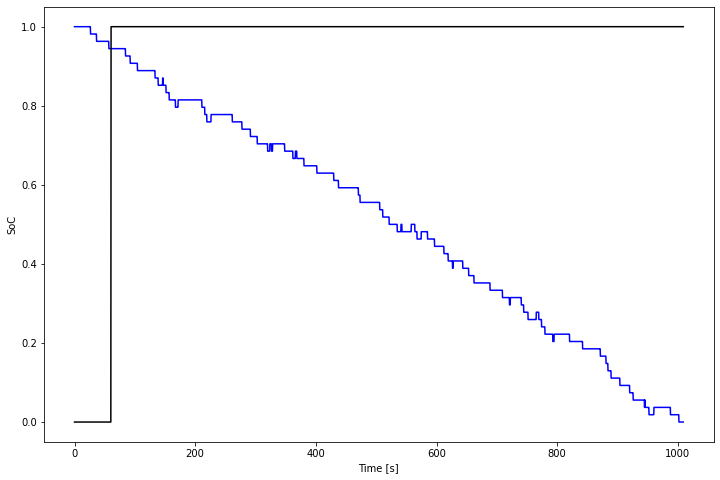

In [ ]:
#Battery SoC and temperature - time graph
plt.figure(figsize=(12,8))
ax = plt.subplot()
ax = sns.lineplot(x=trip['Time [s]'], y=trip1['SoC'], color='blue')
ax = sns.lineplot(x=trip['Time [s]'], y=trip1['temp'], color='black')
plt.show()

<h1>Linear Regression</h1>
<p>SoC(%) prediction based on Time (s)</p>
<p>Dataset: TripA01.csv</p>

In [ ]:
#Select time and SoC columns for Linear regression
trip1 = trip[['Time [s]', 'SoC [%]']]
trip1.columns = ['time', 'SoC']

#convert 1D pandas series to 2D numpy array
x = np.array(trip1['time']).reshape(-1, 1)
y = np.array(trip1['SoC']).reshape(-1, 1)

#Train Linear regression
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)
model = LinearRegression() 
model.fit(x_train, y_train)

print("val_accuracy: " ,round(model.score(x_test, y_test), 4)*100, "%")
print("Predicted SoC for 21s: ", round(model.predict([[21]])[0][0], 2), "%")

val_accuracy:  99.53999999999999 %
Predicted SoC for 21s:  86.89 %


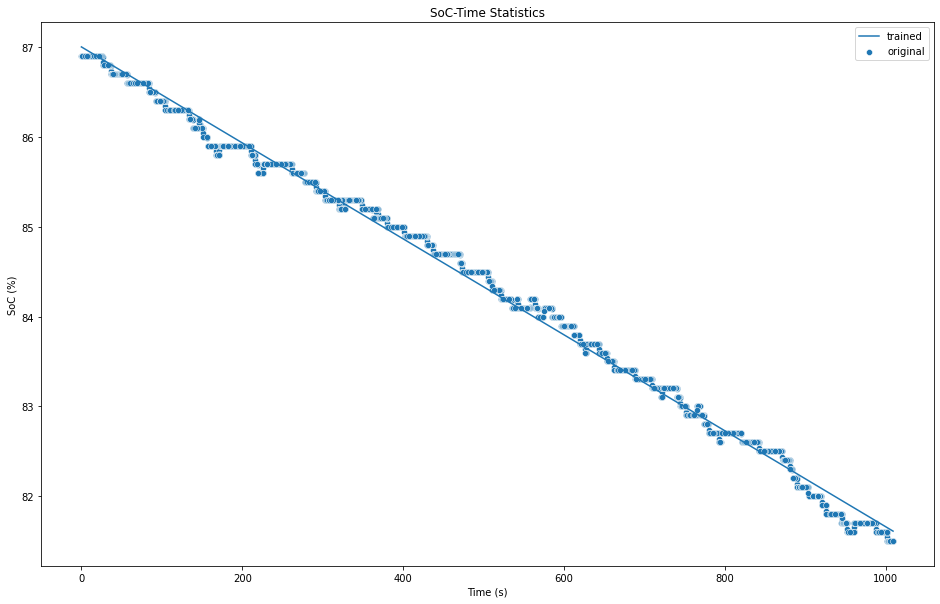

In [ ]:
plt.figure(figsize=(16, 10))

df = pd.DataFrame({'Time (s)': x_train.flatten(),
                   'SoC (%)': y_train.flatten()})

ax= plt.subplot()
ax = sns.scatterplot(x=df['Time (s)'], y=df['SoC (%)'])
ax = sns.lineplot(x=df['Time (s)'], y=model.predict(x_train).flatten())
plt.title('SoC-Time Statistics')
ax.legend(['trained', 'original'])
plt.show()

<h1>Multiple Linear Regression</h1>
<p>SoC(%) prediction based on Time (s) and Batery Temperature (°C)</p>
<p>Dataset: TripA01.csv</p>

In [ ]:
trip2 = trip[['Time [s]', 'SoC [%]', 'Battery Temperature [°C]']]
trip2.columns = ['time', 'SoC', 'battery']

x = np.array(trip2[['time', 'battery']]).reshape(-1, 2)
y = np.array(trip2['SoC']).reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)
model = LinearRegression()
 
model.fit(x_train, y_train)
print("val_accuracy: " ,round(model.score(x_test, y_test), 4)*100, "%")
print("Predicted SoC for 21s at 21°C: ", round(model.predict([[21, 21]])[0][0], 2), "%")

val_accuracy:  99.53999999999999 %
Predicted SoC for 21s at 21°C:  86.85 %


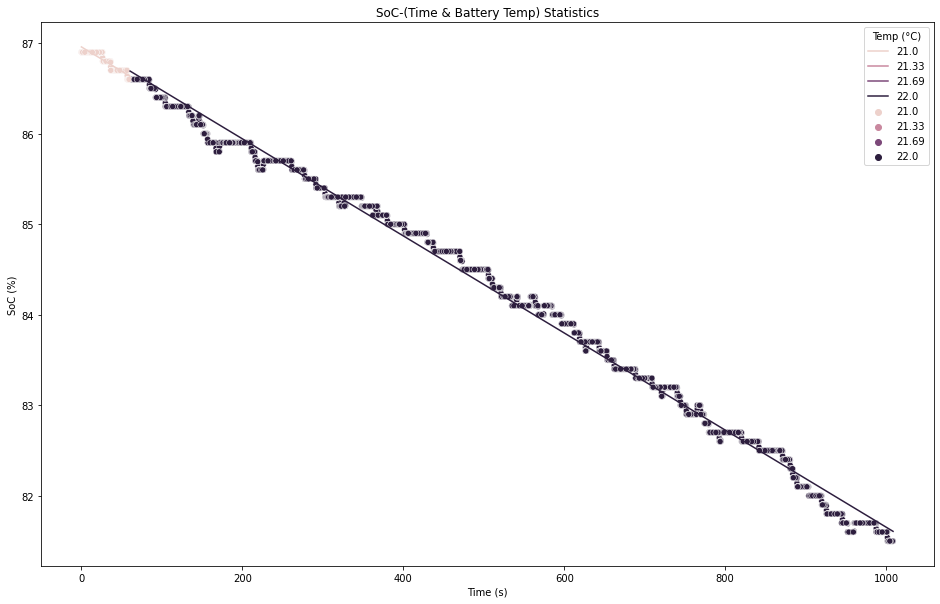

In [ ]:
plt.figure(figsize=(16, 10))

df = pd.DataFrame({'Time (s)': [i[0] for i in x_train.tolist()],
         'Temp (°C)': [i[1] for i in x_train.tolist()],
         'SoC (%)': y_train.flatten()})

ax= plt.subplot()
ax = sns.scatterplot(x=df['Time (s)'], y=df['SoC (%)'], hue=df['Temp (°C)'])
ax = sns.lineplot(x=df['Time (s)'], y=model.predict(x_train).flatten(), hue=df['Temp (°C)'])
plt.title('SoC-(Time & Battery Temp) Statistics')
plt.show()